In [277]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [174]:
# Load in data
mobility = pd.read_csv("data/mobility.csv", sep=';')
measures = pd.read_csv("data/measures_database.csv", sep=';')
# economy = pd.read_csv("data/WEO_Data.csv", sep='\t')
# df= pd.read_csv("data/measures_joined_mobility.csv", sep=';') # dataset not full

In [175]:
# df = mobility.merge(measures, left_on='country_region', right_on='COUNTRY', suffixes=(False, False))
# df.shape

In [176]:
# mobility.head()
# measures.head()
# df.head()
# economy.head()

In [177]:
# df_reduced = df.dropna(axis='columns', how='all')
# df_reduced = df_reduced[df_reduced['sub_region_1'].isna()]
# columns_to_drop = ['ADMIN_LEVEL_NAME', 
#                    'Alternative source', 
#                    'LINK',
#                    'ID',
#                    'LOG_TYPE',
#                    'country_region',
#                    'country_region_code',
#                    'ENTRY_DATE',
# #                    'Number of Records',
#                    'SOURCE',
#                    'SOURCE_TYPE',
#                    'NON_COMPLIANCE',
#                    'TARGETED_POP_GROUP',
#                    'COMMENTS',
#                    'sub_region_1'
#                   ]
# df_reduced.drop(columns=columns_to_drop, inplace=True)

# df_reduced.sort_values(by='date',ascending=True, inplace=True)

In [178]:
mobility = mobility[mobility['sub_region_1'].isna()]
mobility.drop(['sub_region_1','sub_region_2'], axis='columns', inplace=True)

In [182]:
mobility = mobility.dropna(axis='columns', how='all')
mobility['date'] = pd.to_datetime(mobility['date'], dayfirst=True)

measures = measures.dropna(axis='rows', subset=['DATE_IMPLEMENTED'])
measures = measures.dropna(axis='columns', how='all')
measures['DATE_IMPLEMENTED'] = pd.to_datetime(measures['DATE_IMPLEMENTED'], dayfirst=True)

measures = measures[measures['LOG_TYPE'] != "Phase-out measure"] #Not looking at phase-out atm, only introduction

# economy.dropna(axis='columns', how='all', inplace=True)

In [274]:
country_name = 'Netherlands'
measures_nl = measures[measures['COUNTRY'] == country_name]
mobility_nl = mobility[mobility['country_region'] == country_name]
economy_nl = economy[economy['Country'] == country_name]

mobility_nl.reset_index(inplace=True)
measures_nl.reset_index(inplace=True)
# mobility_nl.head()
measures_nl.head()

,index,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,5313,416,Netherlands,NLD,North Brabant,Europe,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,Yes,residents with symptoms requested to self-quar...,Not applicable,2020-03-06,Government,Government,https://www.government.nl/ministries/ministry-...,15/03/2020,NaN
1,5314,417,Netherlands,NLD,NaN,Europe,Introduction / extension of measures,Social distancing,Limit public gatherings,No,limit of public gatherings to 100 persons unti...,Not applicable,2020-03-12,Government,Government,https://www.government.nl/ministries/ministry-...,15/03/2020,NaN
2,5315,418,Netherlands,NLD,NaN,Europe,Introduction / extension of measures,Social distancing,Schools closure,No,closure of schools and nurseries from 15 March...,Not applicable,2020-03-16,Government,Government,https://www.rijksoverheid.nl/actueel/nieuws/20...,15/03/2020,NaN
3,5316,885,Netherlands,NLD,NaN,Europe,Introduction / extension of measures,Social distancing,Public services closure,No,"All bars, cafes, restaurants, sports clubs, gy...",Fines,2020-03-15,Government of NL,Government,https://www.government.nl/latest/news/2020/03/...,20/03/2020,NaN
4,5317,886,Netherlands,NLD,NaN,Europe,Introduction / extension of measures,Public health measures,General recommendations,No,Everyone in the Netherlands is requested to ke...,Fines,2020-03-15,Governmnet of NL,Government,https://www.government.nl/latest/news/2020/03/...,20/03/2020,NaN


In [184]:
# df_nl[100:110]
# df_nl[df_nl['CATEGORY'] == 'Public health measures']

In [185]:
# df_nl[df_nl['CATEGORY'] == 'Public health measures'].plot(x='date', kind='line', grid=True, subplots=True, sharex= True, sharey=True, figsize = (20, 20), backend='matplotlib')
# set_to_plot = df_nl[df_nl['MEASURE']=="Isolation and quarantine policies"]
# axes = set_to_plot.plot(x='date', kind='line', grid=True, sharex= True, sharey=True, figsize = (20, 20), backend='matplotlib')
# plt.pyplot.vlines(x=set_to_plot['DATE_IMPLEMENTED'][1:2], ymin=-70, ymax=70)

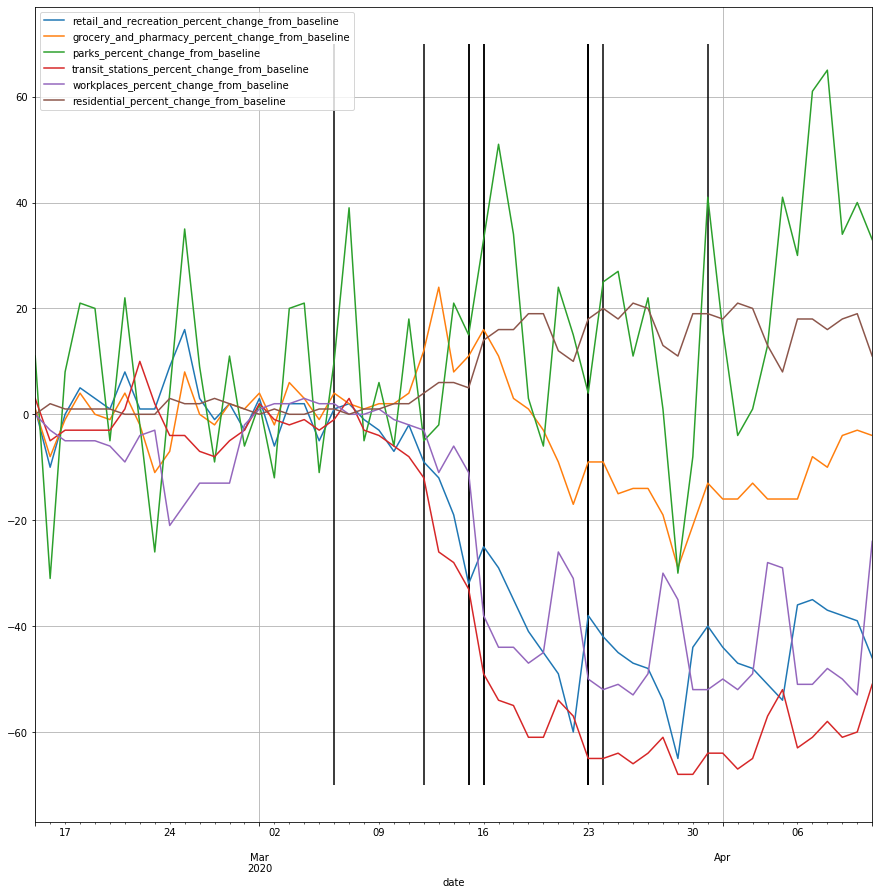

In [280]:
sectors = ['retail_and_recreation_percent_change_from_baseline',
           'grocery_and_pharmacy_percent_change_from_baseline',   
           'parks_percent_change_from_baseline',   'transit_stations_percent_change_from_baseline',   'workplaces_percent_change_from_baseline',
           'residential_percent_change_from_baseline']
axes = mobility_nl.plot(x='date', y=sectors, kind='line', grid=True, sharex= True, sharey=True, figsize = (15, 15), backend='matplotlib')
plt.vlines(x=measures_nl['DATE_IMPLEMENTED'].values, ymin=-70, ymax=70)
plt.savefig('mobility_nl.png', bbox='tight')

In [251]:
binary_var_length = []
for date in measures_nl['DATE_IMPLEMENTED']:
    length = mobility_nl.index[mobility_nl['date'] == date]
    if length.size != 0:
        binary_var_length.append(mobility_nl.index[mobility_nl['date'] == date][0])

In [255]:
from scipy import stats

for i in range(len(binary_var_length)):
    binary_var= [0 for j in range(binary_var_length[i])] + [1 for k in range(57-binary_var_length[i])]
    mobility_nl_work = mobility_nl['workplaces_percent_change_from_baseline']
    continuous_var = mobility_nl_work.values

    print(stats.pointbiserialr(binary_var, continuous_var))

PointbiserialrResult(correlation=-0.6193293117283578, pvalue=2.8066113920369764e-07)
PointbiserialrResult(correlation=-0.8260360233381547, pvalue=2.5908602615011226e-15)
PointbiserialrResult(correlation=-0.9270698136118202, pvalue=4.227329432345182e-25)
PointbiserialrResult(correlation=-0.9055943358557804, pvalue=3.8413046446968534e-22)
PointbiserialrResult(correlation=-0.9055943358557804, pvalue=3.8413046446968534e-22)
PointbiserialrResult(correlation=-0.9270698136118202, pvalue=4.227329432345182e-25)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361

In [265]:
measures_nl.MEASURE.values
mobility_nl

,index,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,51724,NL,Netherlands,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
1,51725,NL,Netherlands,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2,51726,NL,Netherlands,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
3,51727,NL,Netherlands,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
4,51728,NL,Netherlands,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0
5,51729,NL,Netherlands,2020-02-20,1.0,-1.0,-5.0,-3.0,-6.0,1.0
6,51730,NL,Netherlands,2020-02-21,8.0,4.0,22.0,1.0,-9.0,0.0
7,51731,NL,Netherlands,2020-02-22,1.0,-2.0,-2.0,10.0,-4.0,0.0
8,51732,NL,Netherlands,2020-02-23,1.0,-11.0,-26.0,2.0,-3.0,0.0
9,51733,NL,Netherlands,2020-02-24,9.0,-7.0,4.0,-4.0,-21.0,3.0
